# Sberbank: Russian Housing Market

url = https://www.kaggle.com/c/sberbank-russian-housing-market

### Understanding the Question

Given macro-econmic data and recent real estate sales data, we are to predict the sale price of properties in a test set.  

This is a supervised regression problem.

### Getting Started - Load & Inspect Data

We are given two datasets for this project.  Our train & test sets which are the details regarding real estate sales, and a macro-economic data set.  This macro set will need to be joined to both train & test datasets on the "timestamp" column.

We are also told the target variable is a column called 'price_doc' which represents the final price of a sale.

In [1]:
import pandas as pd
import numpy as np

#Load Data
macro_raw = pd.read_csv('data/macro.csv')
train_raw = pd.read_csv('data/train.csv')
test_raw = pd.read_csv('data/test.csv')

#### Investigate Train Data

In [9]:
train_raw.shape

(30471, 292)

In [10]:
train_raw.dtypes

id                                         int64
timestamp                                 object
full_sq                                    int64
life_sq                                  float64
floor                                    float64
max_floor                                float64
material                                 float64
build_year                               float64
num_room                                 float64
kitch_sq                                 float64
state                                    float64
product_type                              object
sub_area                                  object
area_m                                   float64
raion_popul                                int64
green_zone_part                          float64
indust_part                              float64
children_preschool                         int64
preschool_quota                          float64
preschool_education_centers_raion          int64
children_school     

In [11]:
train_raw.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [12]:
#Check for NaNs
train_raw.isnull().sum()

id                                           0
timestamp                                    0
full_sq                                      0
life_sq                                   6383
floor                                      167
max_floor                                 9572
material                                  9572
build_year                               13605
num_room                                  9572
kitch_sq                                  9572
state                                    13559
product_type                                 0
sub_area                                     0
area_m                                       0
raion_popul                                  0
green_zone_part                              0
indust_part                                  0
children_preschool                           0
preschool_quota                           6688
preschool_education_centers_raion            0
children_school                              0
school_quota 

##### Investigate Macro Data

In [14]:
macro_raw.shape

(2484, 100)

In [15]:
macro_raw.dtypes

timestamp                                      object
oil_urals                                     float64
gdp_quart                                     float64
gdp_quart_growth                              float64
cpi                                           float64
ppi                                           float64
gdp_deflator                                  float64
balance_trade                                 float64
balance_trade_growth                          float64
usdrub                                        float64
eurrub                                        float64
brent                                         float64
net_capital_export                            float64
gdp_annual                                    float64
gdp_annual_growth                             float64
average_provision_of_build_contract           float64
average_provision_of_build_contract_moscow    float64
rts                                           float64
micex                       

In [16]:
macro_raw.head()

,timestamp,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,2010-01-01,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
1,2010-01-02,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
2,2010-01-03,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
3,2010-01-04,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.905,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
4,2010-01-05,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.836,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN


In [17]:
#Check for NaNs
macro_raw.isnull().sum()

timestamp                                        0
oil_urals                                        0
gdp_quart                                       90
gdp_quart_growth                                90
cpi                                             31
ppi                                             31
gdp_deflator                                   365
balance_trade                                   31
balance_trade_growth                            90
usdrub                                           3
eurrub                                           3
brent                                            3
net_capital_export                             396
gdp_annual                                       0
gdp_annual_growth                                0
average_provision_of_build_contract              0
average_provision_of_build_contract_moscow     365
rts                                             10
micex                                           10
micex_rgbi_tr                  

### What does the data show?

It seems there are quite a lot of NaN values.  I am thinking best way around this will be using a decision tree based classifier to start with.  Decision tree's are able to handle missing data like this quite well.

Also might need to look into some dimensionality reduction as there seem to be a good number of columns.  Will have to spend some time reading the column descriptions, checking feature importance, and maybe using a dimensionality reduction algorithm too.

For now, let's join the macro data to train and test sets.

In [2]:
#Join macro-economic data
train = train_raw.join(macro_raw, on='timestamp', rsuffix='_macro')
test = test_raw.join(macro_raw, on='timestamp', rsuffix='_macro')
train.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Feature Exploration & Engineering

Now we can spend sometime looking at feature correlations, plotting relationships between the features, and trying to come up with some new features.  However, for this first run through I am going to skip this part and just train a model using all available data.  Partially I just want to get a first submission in as a baseline but also we can explore the feature_importances that our tree finds after we train one.

In [21]:
def add_features(df):
    '''(DataFrame) -> DataFrame
    
    Add's features, meant to be used for both train and test df's.
    '''
    return df

### Prepare Data for ML

First we need to convert all non-numerical columns then we need to seperate data into training features and labels.

##### Dealing with non-numerical data

In [40]:
#How many non-numerical columns do we have?
train.dtypes.value_counts()

float64    215
int64      157
object      20
dtype: int64

In [41]:
#Get a list of all columns that need to be converted
cols_to_convert = train.select_dtypes(include=['object'], exclude=['int64', 'float64']).columns
cols_to_convert

Index([u'timestamp', u'product_type', u'sub_area', u'culture_objects_top_25',
       u'thermal_power_plant_raion', u'incineration_raion',
       u'oil_chemistry_raion', u'radiation_raion', u'railroad_terminal_raion',
       u'big_market_raion', u'nuclear_reactor_raion',
       u'detention_facility_raion', u'water_1line', u'big_road1_1line',
       u'railroad_1line', u'ecology', u'timestamp_macro',
       u'child_on_acc_pre_school', u'modern_education_share',
       u'old_education_build_share'],
      dtype='object')

In [42]:
train[cols_to_convert].isnull().sum()

timestamp                        0
product_type                     0
sub_area                         0
culture_objects_top_25           0
thermal_power_plant_raion        0
incineration_raion               0
oil_chemistry_raion              0
radiation_raion                  0
railroad_terminal_raion          0
big_market_raion                 0
nuclear_reactor_raion            0
detention_facility_raion         0
water_1line                      0
big_road1_1line                  0
railroad_1line                   0
ecology                          0
timestamp_macro              30471
child_on_acc_pre_school      30471
modern_education_share       30471
old_education_build_share    30471
dtype: int64

In [43]:
#See how many unique values for all non-numerical columns
train[cols_to_convert].apply(pd.Series.nunique)

timestamp                    1161
product_type                    2
sub_area                      146
culture_objects_top_25          2
thermal_power_plant_raion       2
incineration_raion              2
oil_chemistry_raion             2
radiation_raion                 2
railroad_terminal_raion         2
big_market_raion                2
nuclear_reactor_raion           2
detention_facility_raion        2
water_1line                     2
big_road1_1line                 2
railroad_1line                  2
ecology                         5
timestamp_macro                 0
child_on_acc_pre_school         0
modern_education_share          0
old_education_build_share       0
dtype: int64

In [44]:
train[cols_to_convert].head()

,timestamp,product_type,sub_area,culture_objects_top_25,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,water_1line,big_road1_1line,railroad_1line,ecology,timestamp_macro,child_on_acc_pre_school,modern_education_share,old_education_build_share
0,2011-08-20,Investment,Bibirevo,no,no,no,no,no,no,no,no,no,no,no,no,good,NaN,NaN,NaN,NaN
1,2011-08-23,Investment,Nagatinskij Zaton,yes,no,no,no,no,no,no,no,no,no,no,no,excellent,NaN,NaN,NaN,NaN
2,2011-08-27,Investment,Tekstil'shhiki,no,no,no,no,yes,no,no,no,no,no,no,no,poor,NaN,NaN,NaN,NaN
3,2011-09-01,Investment,Mitino,no,no,no,no,no,no,no,no,no,no,no,no,good,NaN,NaN,NaN,NaN
4,2011-09-05,Investment,Basmannoe,no,no,no,no,yes,yes,no,no,no,no,no,yes,excellent,NaN,NaN,NaN,NaN


In [3]:
def add_date_features(df):
    '''(DataFrame) -> DataFrame
    
    Will add some specific columns based on the date
    of the sale.
    '''
    #Convert to datetime to make extraction easier
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    #Extract features
    df['month'] = df['timestamp'].dt.month
    df['day'] = df['timestamp'].dt.day
    df['year'] = df['timestamp'].dt.year
    df.drop('timestamp', axis=1, inplace=True)
    return df

In [4]:
def preprocess_data_for_ml(df):
    '''(DataFrame) -> DataFrame
    
    Given train and test df's of features, convert text features to
    numerical labels, convert the date to a more useable format, and
    remove NaN columns.
    '''
    #Drop NaN features
    df.drop('timestamp_macro', axis=1, inplace=True)
    df.drop('child_on_acc_pre_school', axis=1, inplace=True)
    df.drop('modern_education_share', axis=1, inplace=True)
    df.drop('old_education_build_share', axis=1, inplace=True)
    #Add Date
    df = add_date_features(df)
    return df

In [5]:
train = preprocess_data_for_ml(train)
test = preprocess_data_for_ml(test)

#### Now enconde non-numerical data

In [6]:
from sklearn.preprocessing import LabelEncoder

def encode_object_features(train, test):
    '''(DataFrame, DataFrame) -> DataFrame, DataFrame
    
    Will encode each non-numerical column.
    '''
    cols_to_encode = train.select_dtypes(include=['object'], exclude=['int64', 'float64']).columns
    for col in cols_to_encode:
        le = LabelEncoder()
        #Fit on both sets of data
        le.fit(train[col].append(test[col]))
        #Transform each
        train[col] = le.transform(train[col])
        test[col] = le.transform(test[col])
    
    return train, test

In [7]:
#Enconde Non-Numerical Features
train, test = encode_object_features(train, test)

C:\ProgramData\Anaconda2\lib\site-packages\numpy\lib\arraysetops.py:200: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))
C:\ProgramData\Anaconda2\lib\site-packages\numpy\lib\arraysetops.py:259: FutureWarning: numpy equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  return aux[:-1][aux[1:] == aux[:-1]]


In [8]:
train.dtypes.value_counts()

float64    215
int64      175
dtype: int64

In [11]:
#Pickle for easy backup
train.to_pickle('train_df.pickle')
test.to_pickle('test_df.pickle')

In [ ]:
#Load in from here
train = pd.read_pickle('train_df.pickle')
test = pd.read_pickle('test_df.pickle')

In [9]:
#Select all feature columns (except our label column)
X_train = train.ix[:, train.columns != 'price_doc'].values
X_test = test.values
#Feature matrices should have same number of columns
assert(X_train.shape[1] == X_test.shape[1])

In [10]:
#Select training labels
Y_train = train['price_doc'].values

### Build ML Model

Our data is set, let's build an ML model now.  I am choosing to use XGBoost for my tree based model.

In [12]:
from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit, cross_val_score


#Initialize Model
xgb = XGBRegressor()
#Create cross-validation
cv = TimeSeriesSplit(n_splits=4)
#Train & Test Model
cross_val_results = cross_val_score(xgb, X_train, Y_train, cv=cv, scoring='neg_mean_squared_error')
print cross_val_results.mean()

-7.98651473264e+12


In [23]:
xgb = XGBRegressor(n_estimators=100)

In [24]:
model = xgb.fit(X_train, Y_train)

In [25]:
predictions = xgb.predict(X_test)

##### Feature Importances

Take a look at the feature importances, this can help with the next iteration of our model.

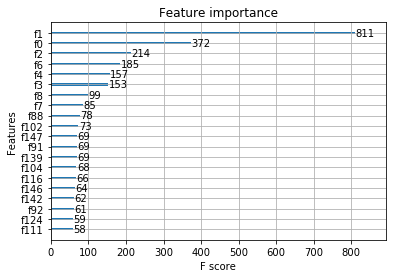

In [43]:
from xgboost import plot_importance
%matplotlib inline

plot_importance(model, max_num_features=20)

In [37]:
importances = zip(model.feature_importances_, train.ix[:, train.columns != 'price_doc'].columns)
importances = pd.DataFrame(importances, columns=['importance', 'feature'])
importances.sort_values('importance', ascending=False).head(20)

,importance,feature
1,0.123760,full_sq
0,0.056768,id
2,0.032657,life_sq
6,0.028231,build_year
4,0.023958,max_floor
3,0.023348,floor
8,0.015108,kitch_sq
7,0.012971,num_room
88,0.011903,kindergarten_km
102,0.011140,public_transport_station_km


##### Make Submission File

In [26]:
submission_df = pd.DataFrame({'id':test['id'], 'price_doc':predictions})

In [27]:
submission_df.to_csv('xgb.csv', index=False)

### Next Steps

This is my first submission, scored a .33413 on the public leaderboard for this contest.  Not a bad start considering did basically no feature engineering and didn't really do anything about all the NaN data.

Next am going to use the feature importances from this iteration and take my pickled data into a new notebook where I can do some more feature engineering, NaN processing, and focus on the most important features.  And finally, can tweak/ tune the XGB model.